In [1]:
import pandas as pd
import numpy as np

from invest.collect.collect import Collect
from invest.index.index import SMA
from invest.index.index import MACD
from invest.index.index import RSI
from invest.index.index import STOCH

product_list = pd.read_csv('./product.csv')

In [2]:
# 日常数据采集
etoro_period = {'day':'OneDay', 'OneHour':'OneHour', 'FifteenMinutes':'FifteenMinutes'}

col = Collect()
final = pd.DataFrame()
for i in range(0, len(product_list)):
    price_OneDay = col.get_etoro_data(vol=30, period=etoro_period['day'], instrument_ID=product_list['InstrumentID'][i])
    price_OneDay['Period'] = etoro_period['day']
    price_OneDay['Product'] = product_list['Product'][i]
    final = final.append(price_OneDay)
    
    price_OneHour = col.get_etoro_data(vol=1000, period=etoro_period['OneHour'], instrument_ID=product_list['InstrumentID'][i])
    price_OneHour['Period'] = etoro_period['OneHour']
    price_OneHour['Product'] = product_list['Product'][i]
    final = final.append(price_OneHour)
    
    price_FifteenMinutes = col.get_etoro_data(vol=1000, period=etoro_period['FifteenMinutes'], instrument_ID=product_list['InstrumentID'][i])
    price_FifteenMinutes['Period'] = etoro_period['FifteenMinutes']
    price_FifteenMinutes['Product'] = product_list['Product'][i]
    final = final.append(price_FifteenMinutes)
    
one_day = pd.read_csv('./data.csv')
com = final.append(one_day).reset_index(drop=True)
com['FromDate'] = com['FromDate'].astype('str')
com = com.drop_duplicates(['Product','Period','FromDate'])
com = com.to_csv('./data.csv', index=False)

In [3]:
com = pd.read_csv('./data.csv')
OneDay = com.loc[(com['Period'] == 'OneDay')&(com['Product'] == 'dj30'),:].reset_index(drop=True)
OneHour = com.loc[(com['Period'] == 'OneHour')&(com['Product'] == 'dj30'),:].reset_index(drop=True)
FifteenMinutes = com.loc[(com['Period'] == 'FifteenMinutes')&(com['Product'] == 'dj30'),:].reset_index(drop=True)

In [5]:
# 三重滤网系统
# 用三种方法(三重滤网)过滤市场信息和指标信息，三个条件同时满足的时候才是开仓的时候。
# 前提：界定你的时间周期(长线，中线，日内)  大概3倍
# 做多
# 一层滤网：周线MACD来判断，做多MACD周线斜率向上
# 二层滤网：日内的震荡指标kdj，rsi
# 三层滤网：日内分时，盘中突破
# 开仓核心：顺大，逆小，破位
# 平仓核心：长线周趋势反转，短线日内趋势反转
# 止损核心：日内高低点设止损


madc = MACD()
rsi = RSI()
stoch = STOCH()

print(madc.trend(OneDay['Close']))
print(rsi.direction(OneHour['Close']))
print(stoch.direction(OneHour['High'], OneHour['Low'], OneHour['Close']))

('down', '0.86')
('down', 41.99665038711138)
('down', 40.11620383155017, 39.19280791258371)


In [40]:
def energy_points(point):
    ran = max(point) - min(point)
    
def is_open_position():
    """
    是否开仓,三重滤网
    """
    # 根据长线MACD判断趋势，决定多空
    
    # 开盘价之上不空，开盘价之下不多
    
    # 中线技术指标kdj，rsi判断是否开仓
    
    # 短线盘中突破
    
    # 返回真假
    
def set_position():
    """
    设置仓位
    """
    pass
    
def set_stop_loss():
    """
    设置止损
    """
    pass
    
def is_close_out():
    """
    是否平仓
    """
    # 根据长线MACD判断趋势是否反转
    
    # 短线趋势反转
    
    # 返回真假
    pass

SyntaxError: unexpected EOF while parsing (<ipython-input-40-455f1b66ff94>, line 28)

/home/ml/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


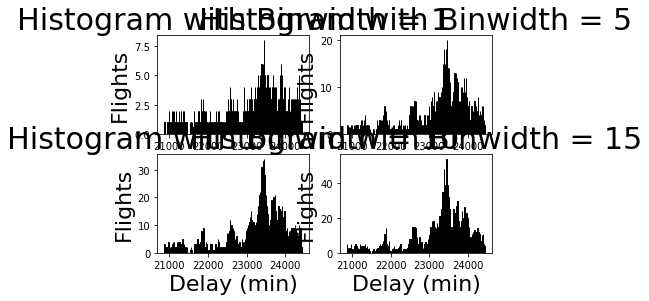

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

point = np.append(FifteenMinutes['High'].values,FifteenMinutes['Low'].values)
ran = max(FifteenMinutes['High'].values) - min(list(FifteenMinutes['Low'].values))


plt.tight_layout()
plt.show()

In [37]:
a= FifteenMinutes['High'].values
b = FifteenMinutes['Low'].values
np.append(a,b)

array([23110.3, 23115.3, 23103.8, ..., 21160.7, 21152.5, 21121.2])

In [4]:
a

,InstrumentID,FromDate,Open,High,Low,Close,Period,Product
0,29,2020-04-22 05:30:00+00:00,23105.8,23110.3,23077.8,23103.3,FifteenMinutes,dj30
1,29,2020-04-22 05:15:00+00:00,23084.3,23115.3,23054.3,23107.3,FifteenMinutes,dj30
2,29,2020-04-22 05:00:00+00:00,23038.4,23103.8,23036.4,23083.8,FifteenMinutes,dj30
3,29,2020-04-22 04:45:00+00:00,23047.8,23066.3,23008.3,23039.9,FifteenMinutes,dj30
4,29,2020-04-22 04:30:00+00:00,23093.3,23093.8,23025.3,23047.3,FifteenMinutes,dj30
...,...,...,...,...,...,...,...,...
1076,29,2020-04-03 11:30:00+00:00,21190.9,21231.8,21184.3,21216.1,FifteenMinutes,dj30
1077,29,2020-04-03 11:15:00+00:00,21180.6,21196.9,21144.1,21192.9,FifteenMinutes,dj30
1078,29,2020-04-03 11:00:00+00:00,21176.2,21211.3,21160.7,21179.6,FifteenMinutes,dj30
1079,29,2020-04-03 10:45:00+00:00,21152.5,21195.4,21152.5,21175.7,FifteenMinutes,dj30


In [ ]:
# 日常交易信号
com = pd.read_csv('./data.csv')
info = []
sma = SMA()
for i in range(0, len(product_list)):
    data = com.loc[(com['Product'] == product_list['Product'][i]),:].reset_index(drop=True)
    fast_period,slow_period = eval(product_list['best_period'][i])
    signal_td,signal_yd = sma.signal(data, fast_period=fast_period, slow_period=slow_period)
    info.append([product_list['Product'][i],signal_td,signal_yd])
    print(product_list['Product'][i],signal_td,signal_yd,fast_period,slow_period)

In [ ]:
# 发送邮件
import smtplib
fromaddr = 'm18349125880@gmail.com'
toaddrs  = 'm18349125880@gmail.com'

head = [
  "From: m18349125880@gmail.com",
  "To: m18349125880@gmail.com",
  "Subject: Futures Transaction Daily",
  ""
  ]

trans = [str(raw) for raw in info]
head.extend(trans)
msg = "\r\n".join(head)

username = 'm18349125880@gmail.com'
password = 'llbisurowvajcgmr'
server = smtplib.SMTP('smtp.gmail.com:587')
server.ehlo()
server.starttls()
server.login(username,password)
server.sendmail(fromaddr, toaddrs, msg)
server.quit()